In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy 
import scipy.optimize as so
from scipy.stats import poisson

# Extended maximum likelihood (15 Points)
The usual maximum likelihood method does not allow for determining the absolute normalisation. 
This can be overcome by using the extended likelihood (for $n$ events, coming from a Poisson distribution with mean 
$\nu$):

$L(\nu,\theta)=\frac{\nu^n}{n!}e^{-\nu} \prod^n_{i=1}f(x_i;\theta)$ (1)

where $\theta$ are the model parameters and $x_i$ the observed values. 
The logarithm of the likelihood then becomes

$\ln L(\nu,\theta) = −\nu + \sum^n_{i=1} \ln(\nu f(x_i;\theta)) + C$ (2)

where $\nu$ can either be a free parameter or a function of $\theta$. $C$ is independent of $\nu$ and $\theta$ and
can thus be ignored in an optimisation.

1. Perform an extended maximum likelihood fit to the power-law data set in the GitHub repo, /notebooks/data/ex6 data.txt. What is the best-fit power-law index?
$L$ is maximized with respect to a variable $\alpha$ when $−\ln L$ is minimized

In [103]:
def f(x, k, xmax): #normalized to the area
    return x**(k)*(k+1)/xmax**(k+1)
def negativlogL(param, x):
    xmax = x.max()
    nu, theta = param
    nll = nu - sum(np.log(nu*f(x[i], theta, xmax)) 
                   for i in np.arange(0, len(x)))
    return nll 

In [104]:
data.max()

2.546474057442313

In [105]:
data = np.genfromtxt(r'../../notebooks/data/ex6_data.txt')

In [106]:
nu, theta = [1,1]
model = so.minimize(negativlogL, x0=[nu, theta] , args=(data), bounds=[(0,10), (-10,10)])

In [107]:
model

      fun: -23304.384284183605
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.99009998e+02,  8.73114919e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([10.        ,  5.03710581])

does not give a result for $\nu$

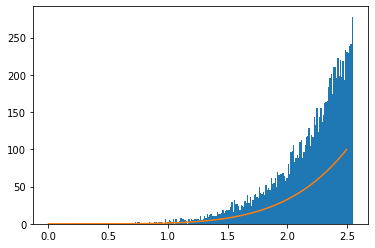

In [79]:
x = np.random.uniform(0, 2.5, 1000)
x.sort()
y = 2x**model["x"][1]
plt.hist(data, bins=200)
plt.plot(x,y)

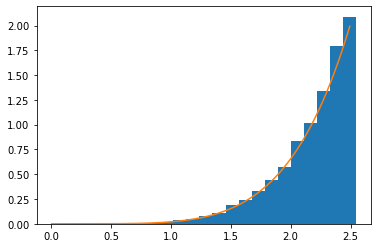

In [84]:
plt.hist(data, bins=20, density=True)
plt.plot(x, 1/50*x**model["x"][1])

I am not sure how to continue here. Probably I understood something wrong. Also the Amplitude depends on the width of binning of the data.
In Lecture 7 we had ML on binned data.
I will try that now. 
$f(x_i) = N\omega P(x_i,a)$ where $N = \sum n_i$

In [101]:
def f_binned(N, w, x, k, xmax): #normalized to the area
    return N*w*x**(k)*(k+1)/xmax**(k+1)
def negativlogL_binned(param, x_middle, xmax, N, w):
    nu, theta = param
    nll = nu - sum(np.log(nu*f_binned(N, w, x_middle, theta, xmax)) 
                   for i in np.arange(0, len(x)))
    return nll 

In [102]:
x_middle = np.histogram_bin_edges(data, bins=20)-width/2
N = len(data)
xmax = data.max()
n_bins = 20 
w = (xmax-data.min())/n_bins
model_bins = so.minimize(negativlogL_binned, x0=[1, 1] , args=(x_middle, xmax, N, w), bounds=[(0,10), (-10,10)])

ValueError: too many axes: 2 (effrank=2), expected rank=1


In [ ]:
did 